In [1]:
import numpy as np

data=np.load('dataChestXray.npy')
target=np.load('targetChestXray.npy')
print(data.shape[1:])

(128, 128, 1)


In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D

model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64,activation='relu'))

model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


Using TensorFlow backend.
C:\Users\Ayodhya\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ayodhya\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ayodhya\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
history=model.fit(train_data,train_target,epochs=8)


Epoch 1/8
4778/4778 [==============================] - 481s 101ms/step - loss: 0.2786 - accuracy: 0.8841
Epoch 2/8
4778/4778 [==============================] - 467s 98ms/step - loss: 0.1147 - accuracy: 0.9579
Epoch 3/8
4778/4778 [==============================] - 470s 98ms/step - loss: 0.1010 - accuracy: 0.9627
Epoch 4/8
4778/4778 [==============================] - 467s 98ms/step - loss: 0.0800 - accuracy: 0.9707
Epoch 5/8
4778/4778 [==============================] - 467s 98ms/step - loss: 0.0660 - accuracy: 0.9747
Epoch 6/8
4778/4778 [==============================] - 470s 98ms/step - loss: 0.0709 - accuracy: 0.9757
Epoch 7/8
4778/4778 [==============================] - 467s 98ms/step - loss: 0.0517 - accuracy: 0.9774
Epoch 8/8
4778/4778 [==============================] - 565s 118ms/step - loss: 0.0360 - accuracy: 0.9885


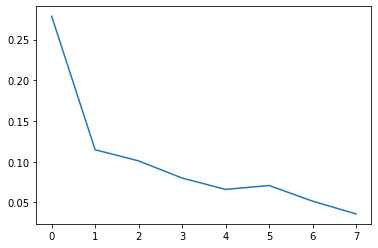

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])

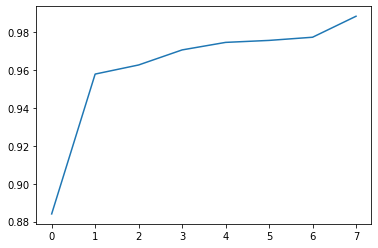

In [6]:
plt.plot(history.history['accuracy'])


In [7]:
print(model.evaluate(test_data,test_target))

531/531 [==============================] - 11s 20ms/step
[0.12430784152557621, 0.9679849147796631]


In [9]:
model.save("ChestXRayPredictions8epochsDropouts.h5")